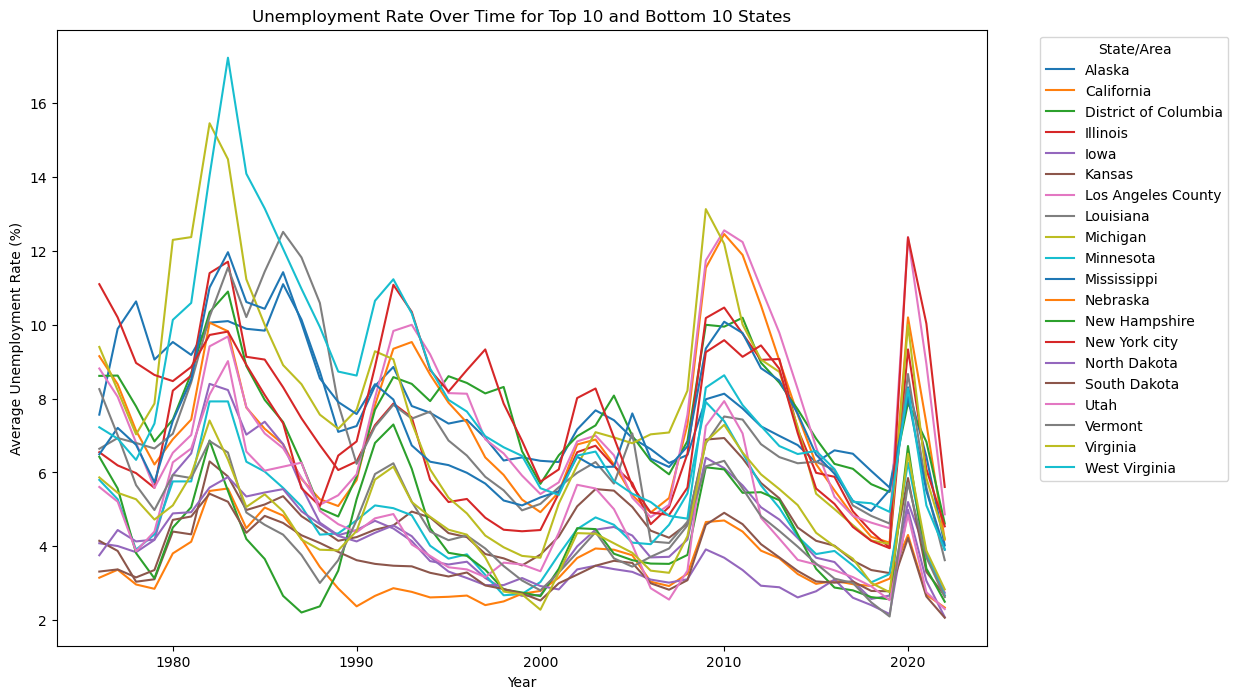

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Unemployment in America Per US State.csv')

# Ensure proper data types
# Convert 'Year' and 'Month' to a datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str), format='%Y%m')
df.set_index('Date', inplace=True)

# Clean and convert data columns
df['Total Civilian Labor Force in State/Area'] = pd.to_numeric(df['Total Civilian Labor Force in State/Area'].str.replace(',', ''), errors='coerce')

# Check data type and convert if necessary for the 'Percent (%) of Labor Force Unemployed in State/Area' column
if df['Percent (%) of Labor Force Unemployed in State/Area'].dtype == object:
    df['Percent of Labor Force Unemployed'] = pd.to_numeric(df['Percent (%) of Labor Force Unemployed in State/Area'].str.replace('%', '').replace(',', ''), errors='coerce')
else:
    df['Percent of Labor Force Unemployed'] = df['Percent (%) of Labor Force Unemployed in State/Area']

# Calculate the average unemployment rate for each state
state_avg_unemployment = df.groupby('State/Area')['Percent of Labor Force Unemployed'].mean()

# Get the top 10 states with the highest average unemployment rates
top_10_states = state_avg_unemployment.nlargest(10).index

# Get the bottom 10 states with the lowest average unemployment rates
bottom_10_states = state_avg_unemployment.nsmallest(10).index

# Filter the dataframe to include only data for the top 10 and bottom 10 states
df_selected_states = df[df['State/Area'].isin(top_10_states) | df['State/Area'].isin(bottom_10_states)]

# For the selected states, calculate the annual average unemployment rate
trends_over_time_selected = df_selected_states.groupby(['State/Area', df_selected_states.index.year])['Percent of Labor Force Unemployed'].mean().unstack()

# Plot trends over time for the selected states
plt.figure(figsize=(12, 8))
for state in trends_over_time_selected.index:
    trends_over_time_selected.loc[state].plot(label=state)

plt.title('Unemployment Rate Over Time for Top 10 and Bottom 10 States')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.legend(title='State/Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



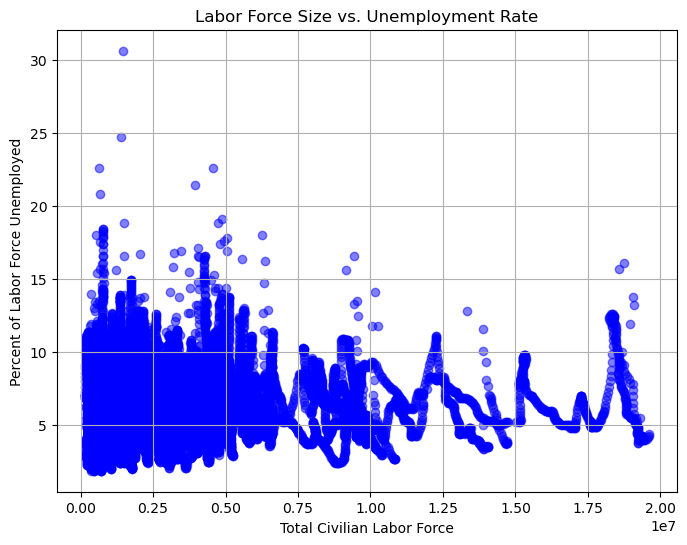

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Total Civilian Labor Force in State/Area'], df['Percent of Labor Force Unemployed'], color='b', alpha=0.5)
plt.xlabel('Total Civilian Labor Force')
plt.ylabel('Percent of Labor Force Unemployed')
plt.title('Labor Force Size vs. Unemployment Rate')
plt.grid(True)
plt.show()





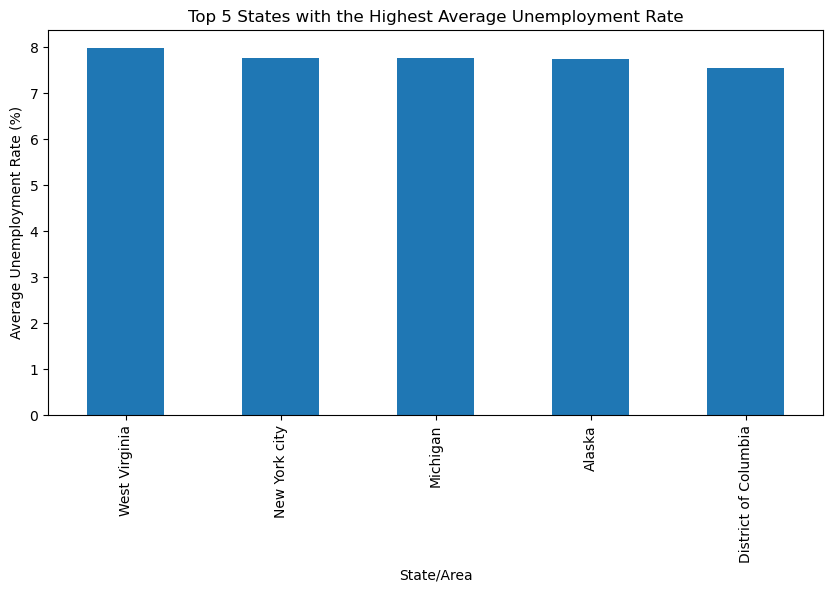

In [14]:
# Question 3: High Unemployment States
high_unemployment_states = df.groupby('State/Area')['Percent of Labor Force Unemployed'].mean().nlargest(5)

high_unemployment_states.plot(kind='bar', figsize=(10, 5))
plt.title('Top 5 States with the Highest Average Unemployment Rate')
plt.xlabel('State/Area')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

/Users/spoorthiv/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


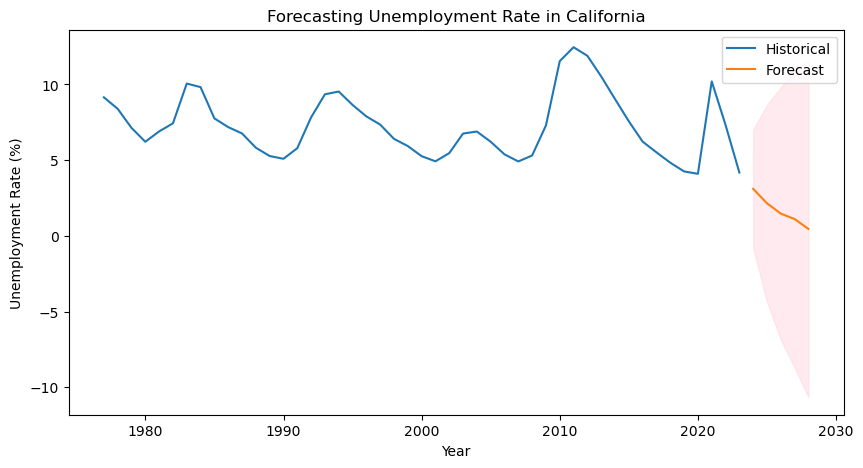

In [16]:
# Question 4: Unemployment Rate Forecasting
# Forecasting is a complex topic and usually requires a separate treatment for each state or a combined model with regional dummy variables. Below is a simple example for a single state.
# Select data for a single state
state_data = df[df['State/Area'] == 'California']['Percent of Labor Force Unemployed'].resample('A').mean()

# Fit an ARIMA model
model = SARIMAX(state_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Forecast the next 5 periods
forecast = results.get_forecast(steps=5)
forecast_index = pd.date_range(state_data.index[-1] + pd.DateOffset(years=1), periods=5, freq='A')
forecast_conf_int = forecast.conf_int()

# Plot the forecast with historical data
plt.figure(figsize=(10, 5))
plt.plot(state_data.index, state_data, label='Historical')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecasting Unemployment Rate in California')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

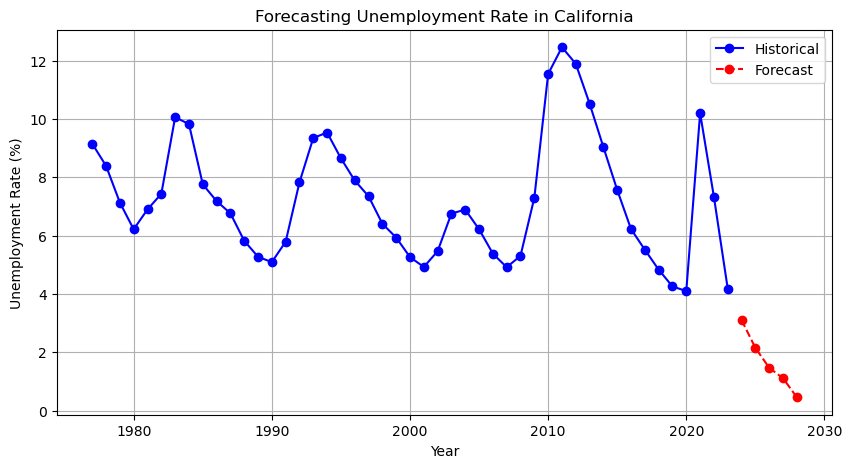

In [18]:
# Plot the forecast with historical data (simplified)
plt.figure(figsize=(10, 5))
plt.plot(state_data.index, state_data, marker='o', linestyle='-', color='b', label='Historical')
plt.plot(forecast_index, forecast.predicted_mean, marker='o', linestyle='--', color='r', label='Forecast')
plt.title('Forecasting Unemployment Rate in California')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


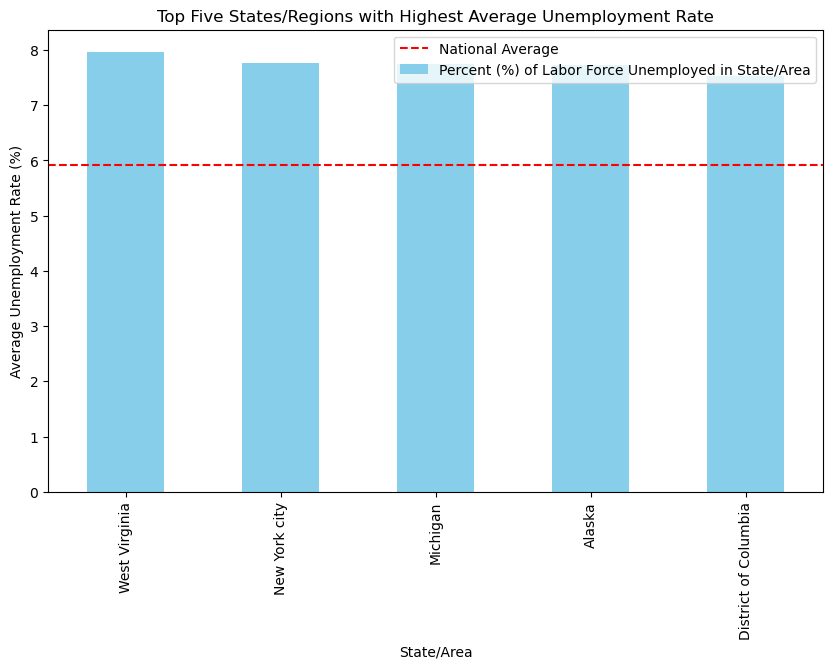

In [21]:
# Calculate average unemployment rate for each state/area
average_unemployment = df.groupby('State/Area')['Percent (%) of Labor Force Unemployed in State/Area'].mean()

# Get top five states/areas with highest average unemployment rates
top_five_states = average_unemployment.nlargest(5)

# Get national average unemployment rate
national_average = average_unemployment.mean()

# Visualize top five states/areas with bar chart and national average with horizontal line
plt.figure(figsize=(10, 6))
top_five_states.plot(kind='bar', color='skyblue')
plt.axhline(y=national_average, color='red', linestyle='--', label='National Average')
plt.xlabel('State/Area')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Top Five States/Regions with Highest Average Unemployment Rate')
plt.legend()
plt.show()


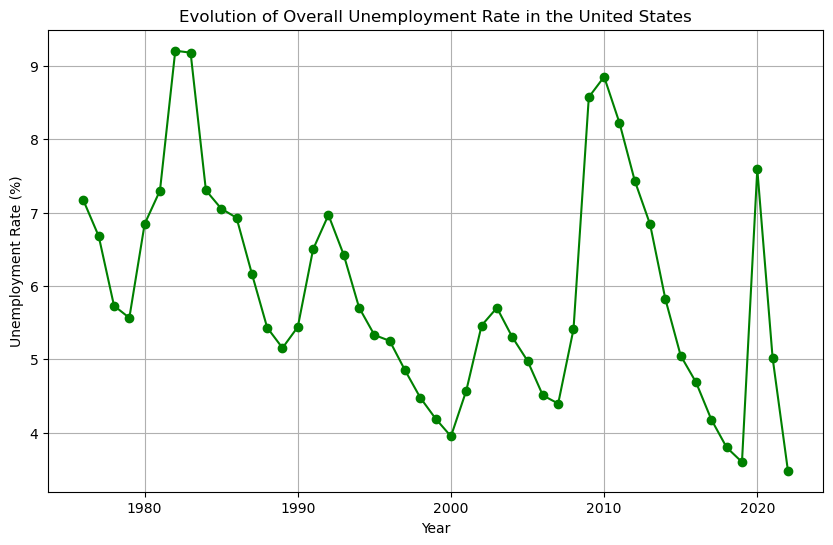

In [22]:
# Aggregate unemployment data at national level
national_unemployment = df.groupby(['Year'])['Percent (%) of Labor Force Unemployed in State/Area'].mean()

# Visualize national unemployment rate over time using line chart
plt.figure(figsize=(10, 6))
national_unemployment.plot(kind='line', marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Evolution of Overall Unemployment Rate in the United States')
plt.grid(True)
plt.show()
